In [13]:
from preprocessing import (
    get_word_types_with_tf_idf
)
from extract_relations import (
    get_directed_relations,
    order_directed_relations,
)
from ontology_algorithm import (
    construct_ontology_hierarchy,
    draw_hierarchy_tree_from_ontology,
)
from topic_modeling import kmeans_tfidf_clustering
import pandas as pd

In [14]:
harry_potter_path = '../data/harry_potter_books.csv'

df = pd.read_csv(harry_potter_path)
# Philosophers stone
philosophers_stone_df = df.query(f'book == "Book 1: Philosopher\'s Stone"')

# Check to make sure dataframe info looks correct 
print(philosophers_stone_df["book"].unique())
philosophers_stone_df.head(20)

["Book 1: Philosopher's Stone"]


,text,book,chapter
0,"THE BOY WHO LIVED Mr. and Mrs. Dursley, of nu...",Book 1: Philosopher's Stone,chap-1
1,"four, Privet Drive, were proud to say that the...",Book 1: Philosopher's Stone,chap-1
2,thank you very much. They were the last people...,Book 1: Philosopher's Stone,chap-1
3,"be involved in anything strange or mysterious,...",Book 1: Philosopher's Stone,chap-1
4,with such nonsense. Mr. Dursley was the direc...,Book 1: Philosopher's Stone,chap-1
5,"called Grunnings, which made drills. He was a ...",Book 1: Philosopher's Stone,chap-1
6,"hardly any neck, although he did have a very l...",Book 1: Philosopher's Stone,chap-1
7,Dursley was thin and blonde and had nearly twi...,Book 1: Philosopher's Stone,chap-1
8,"of neck, which came in very useful as she spen...",Book 1: Philosopher's Stone,chap-1
9,"of her time craning over garden fences, spying...",Book 1: Philosopher's Stone,chap-1


In [15]:
# Chapter titles for Philosopher's Stone book
titles = [
    'The Boy Who Lived',
    'The Vanishing Glass',
    'The Letters From No One',
    'The Keeper of the Keys',
    'Diagon Alley',
    'The Journey from Platform Nine and Three-Quarters',
    'The Sorting Hat',
    'The Potions Master',
    'The Midnight Duel',
    'Hallowe\'en',
    'Quidditch',
    'The Mirror of Erised',
    'Nicolas Flamel',
    'Norbert the Norwegian Ridgeback',
    'The Forbidden Forest',
    'Through the Trapdoor',
    'The Man with Two Faces'
    ]

chapters = []
sentences_per_chapter = []
chapter_text = ''
chapter_df = df
for chapter in philosophers_stone_df["chapter"].unique().tolist():
    chapter_df = philosophers_stone_df.query(f"chapter == '{chapter}'")
    chapter_text = ''
    temp = []
    for text in chapter_df["text"].values.tolist():
        chapter_text += text + ' '
        temp.append(text)
    chapters.append(chapter_text)
    sentences_per_chapter.append(temp)

In [16]:
num_topics = 4
clusters, key_terms_per_cluster = kmeans_tfidf_clustering(chapters = chapters, num_topics = num_topics)
clusters

CLUSTER #1
Cluster Chapters: [4, 7, 13, 14]
Key Features: ['hagrid', 'hermione', 'ron', 'yeh', 'said hagrid', 'norbert', 'snape', 'ter', 'ronan', 'malfoy', 'fang', 'firenze', 'dragon', 'professor', 'unicorn', 'ollivander', 'said harry', 'yer', 'bane', 'mr ollivander', 'neville', 'potter', 'wand', 'forest', 'well', 'quirrell', 'filch', 'mr', 'harry hermione', 'fer', 'charlie', 'cauldron', 'bit', 'anythin', 'griphook', 'tell', 'gringotts', 'go', 'magic', 'class', 'two', 'path', 'told', 'stone', 'keep', 'harry ron', 'night', 'dragons', 'centaur', 'dark']
CLUSTER #2
Cluster Chapters: [1, 2, 3]
Key Features: ['dudley', 'vernon', 'uncle vernon', 'uncle', 'aunt', 'aunt petunia', 'petunia', 'yeh', 'ter', 'hagrid', 'piers', 'cupboard', 'snake', 'kitchen', 'dursleys', 'car', 'letter', 'letters', 'dudleys', 'giant', 'dursley', 'glass', 'go', 'school', 'came', 'house', 'crash', 'never', 'yer', 'sofa', 'television', 'knew', 'room', 'dad', 'smelting', 'smelting stick', 'hogwarts', 'mother', 'said un

{1: [4, 7, 13, 14], 2: [1, 2, 3], 3: [5, 6, 8, 9, 10, 11, 12, 15, 16], 4: [0]}

c:\Users\Zane\uncc\research\hierarchical_clustering\concept_hierarchies\preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
c:\Users\Zane\uncc\research\hierarchical_clustering\concept_hierarchies\preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)



 1  sentences in verse  0
sentence:  THE VANISHING GLASS  Nearly ten years had passed since the Dursleys
ents:  [VANISHING, Nearly ten years, Dursleys]
subject:  GLASS
Compounds:  ['VANISHING']
object:  Dursleys

 1  sentences in verse  1
sentence:  had woken up to find their nephew on the front step, but
ents:  []

 2  sentences in verse  2
sentence:  Privet Drive had hardly changed at all.
ents:  []
subject:  Drive
Negative adverb:  hardly .
Compounds:  ['Privet']
sentence:  The sun rose on the
ents:  []
subject:  sun
object:  the

 1  sentences in verse  3
sentence:  same tidy front gardens and lit up the brass number four on
ents:  [four]
subject:  gardens
More than 2 compounds found for word:  gardens
Compunds:  ['same', 'tidy', 'front']
object:  number
Compounds:  ['brass']

 1  sentences in verse  4
sentence:  the Dursleys' front door; it crept into their living room, which was
ents:  [Dursleys]
subject:  it
object:  room
Compounds:  ['living']
subject:  which

 1  sentences in

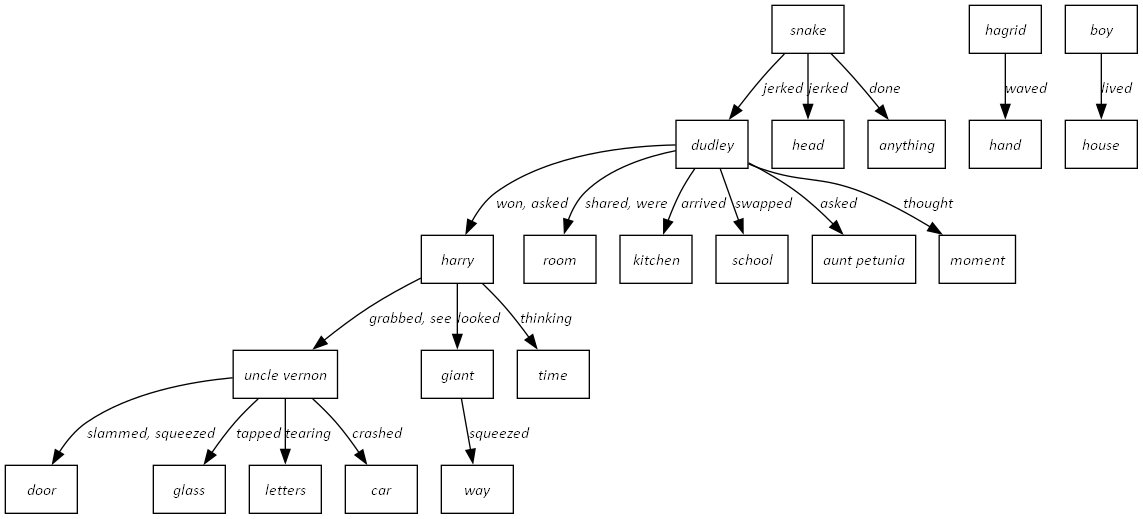

In [17]:
cluster = 2
cluster_chapters = clusters[cluster]
cluster_titles = [titles[i] for i in cluster_chapters]
key_terms = key_terms_per_cluster[cluster]

text_per_chapter = []
for idx in cluster_chapters:
    text_per_chapter.append(chapters[idx])
    
tf_idf_pre_filtering = get_word_types_with_tf_idf(
    text_per_chapter,
    "tf",
    skip_stopwords=True,
    include_verbs=False,
    include_determiners=False,
    include_pronouns=False,
    include_adverbs=False,
    include_numbers=True,
)

all_verses = []
for chapter_idx in cluster_chapters:
    all_verses.extend(sentences_per_chapter[chapter_idx])

top_n_words = tf_idf_pre_filtering.head(50)['word'].values

directed_relations, relations_to_verbs = get_directed_relations(
    top_n_words=top_n_words,
    all_verses=all_verses,
    only_compounds=True,
    verbose=True,
)

ordered_directed_relations = order_directed_relations(
    directed_relations=directed_relations,
    tf_idf_pre_filtering=tf_idf_pre_filtering,
    order_by="tf_idf",
    include_ordering_wrt_occurences=True,
    verbose=False,
)

ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
    ordered_directed_relations=ordered_directed_relations,
)

draw_hierarchy_tree_from_ontology(
    ontological_hierarchy=ontology_hierarchy,
    relations_to_verbs=relations_to_verbs
)

Cluster: #1, cluster chapters: [4, 7, 13, 14]


c:\Users\Zane\uncc\research\hierarchical_clustering\concept_hierarchies\preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
c:\Users\Zane\uncc\research\hierarchical_clustering\concept_hierarchies\preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


                     word                                          word_type  \
0                   harry  {'NNP': 316, 'ORGANIZATION': 9, 'PERSON': 313,...   
1                  hagrid  {'NNP': 197, 'PERSON': 172, 'GPE': 30, 'JJ': 1...   
3                hermione  {'NNP': 56, 'PERSON': 63, 'NN': 13, 'ORGANIZAT...   
5                     ron  {'NNP': 59, 'PERSON': 55, 'ORGANIZATION': 3, '...   
7                     one                                {'NN': 5, 'CD': 54}   
12                   like                       {'IN': 39, 'VB': 4, 'JJ': 2}   
13                  could                               {'MD': 56, 'NNP': 1}   
15              professor  {'NNP': 38, 'PERSON': 15, 'ORGANIZATION': 8, '...   
17                  snape                 {'NN': 8, 'PERSON': 32, 'NNP': 28}   
20                 malfoy  {'NNP': 33, 'PERSON': 21, 'GPE': 12, 'VBN': 1,...   
23                 potter                 {'NN': 3, 'PERSON': 26, 'NNP': 27}   
25                   wand               

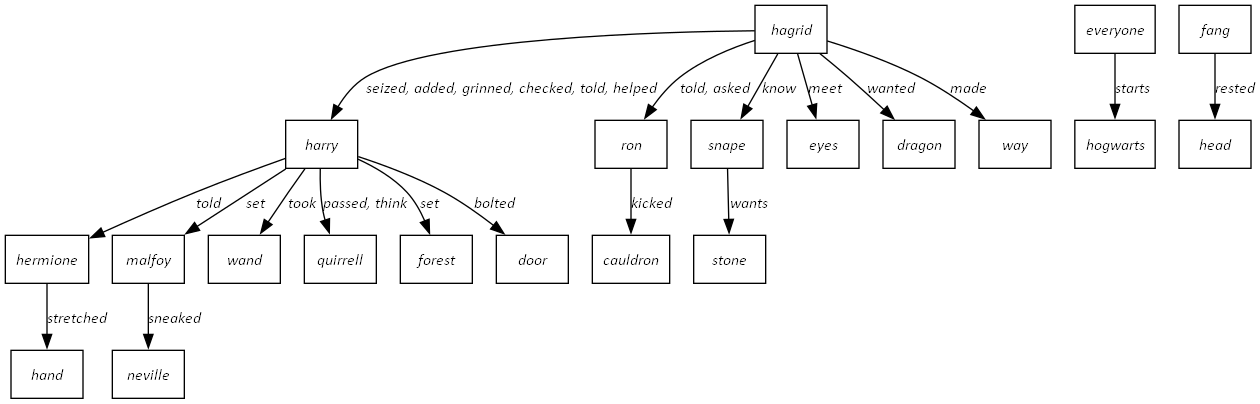

Cluster: #2, cluster chapters: [1, 2, 3]


c:\Users\Zane\uncc\research\hierarchical_clustering\concept_hierarchies\preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
c:\Users\Zane\uncc\research\hierarchical_clustering\concept_hierarchies\preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


            word                                          word_type   tc  \
0          harry  {'NNP': 190, 'PERSON': 184, 'GSP': 2, 'ORGANIZ...  195   
1         dudley  {'NNP': 110, 'PERSON': 101, 'NN': 3, 'GPE': 8,...  116   
2         vernon  {'NNP': 95, 'PERSON': 88, 'GPE': 4, 'ORGANIZAT...   98   
3          uncle  {'NNP': 76, 'PERSON': 86, 'NN': 19, 'ORGANIZAT...   95   
4   uncle vernon  {'NN': 19, 'RB': 1, 'NNP': 171, 'VB': 1, 'GPE'...   90   
6           aunt  {'NNP': 44, 'ORGANIZATION': 2, 'NN': 8, 'PERSO...   52   
7        petunia  {'NNP': 47, 'ORGANIZATION': 2, 'PERSON': 43, '...   48   
8   aunt petunia  {'GPE': 2, 'ORGANIZATION': 4, 'NN': 8, 'NNP': ...   45   
9            one                     {'NN': 13, 'CD': 30, 'NNP': 1}   44   
11          like                       {'IN': 40, 'JJ': 1, 'VB': 1}   42   
12        hagrid  {'NNP': 34, 'PERSON': 24, 'GPE': 9, 'RB': 2, '...   40   
14         could                                         {'MD': 57}   39   
18        le

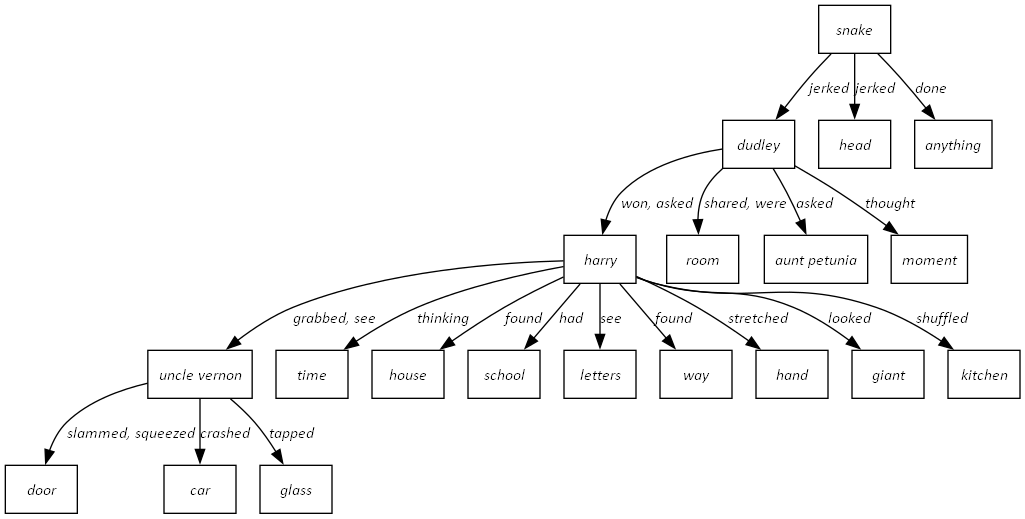

Cluster: #3, cluster chapters: [5, 6, 8, 9, 10, 11, 12, 15, 16]


c:\Users\Zane\uncc\research\hierarchical_clustering\concept_hierarchies\preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
c:\Users\Zane\uncc\research\hierarchical_clustering\concept_hierarchies\preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


                    word                                          word_type  \
0                  harry  {'NNP': 739, 'PERSON': 739, 'NN': 26, 'ORGANIZ...   
2                    ron  {'NNP': 298, 'PERSON': 297, 'RB': 42, 'NN': 15...   
3               hermione  {'JJ': 1, 'PERSON': 163, 'NNP': 135, 'GPE': 5,...   
4                    one                              {'CD': 118, 'NN': 24}   
6                  snape  {'NNP': 110, 'ORGANIZATION': 1, 'PERSON': 107,...   
10             professor  {'NNP': 101, 'PERSON': 34, 'VB': 3, 'ORGANIZAT...   
12                 could                 {'MD': 161, 'NNP': 1, 'PERSON': 1}   
13            dumbledore  {'NNP': 81, 'PERSON': 55, 'RB': 9, 'GPE': 12, ...   
14                  like                       {'IN': 86, 'VB': 9, 'JJ': 3}   
16               neville  {'NNP': 83, 'GPE': 14, 'PERSON': 66, 'NN': 1, ...   
18                hagrid  {'NNP': 78, 'PERSON': 66, 'GPE': 19, 'NN': 6, ...   
20                malfoy  {'NNP': 78, 'GPE': 31, 'PE

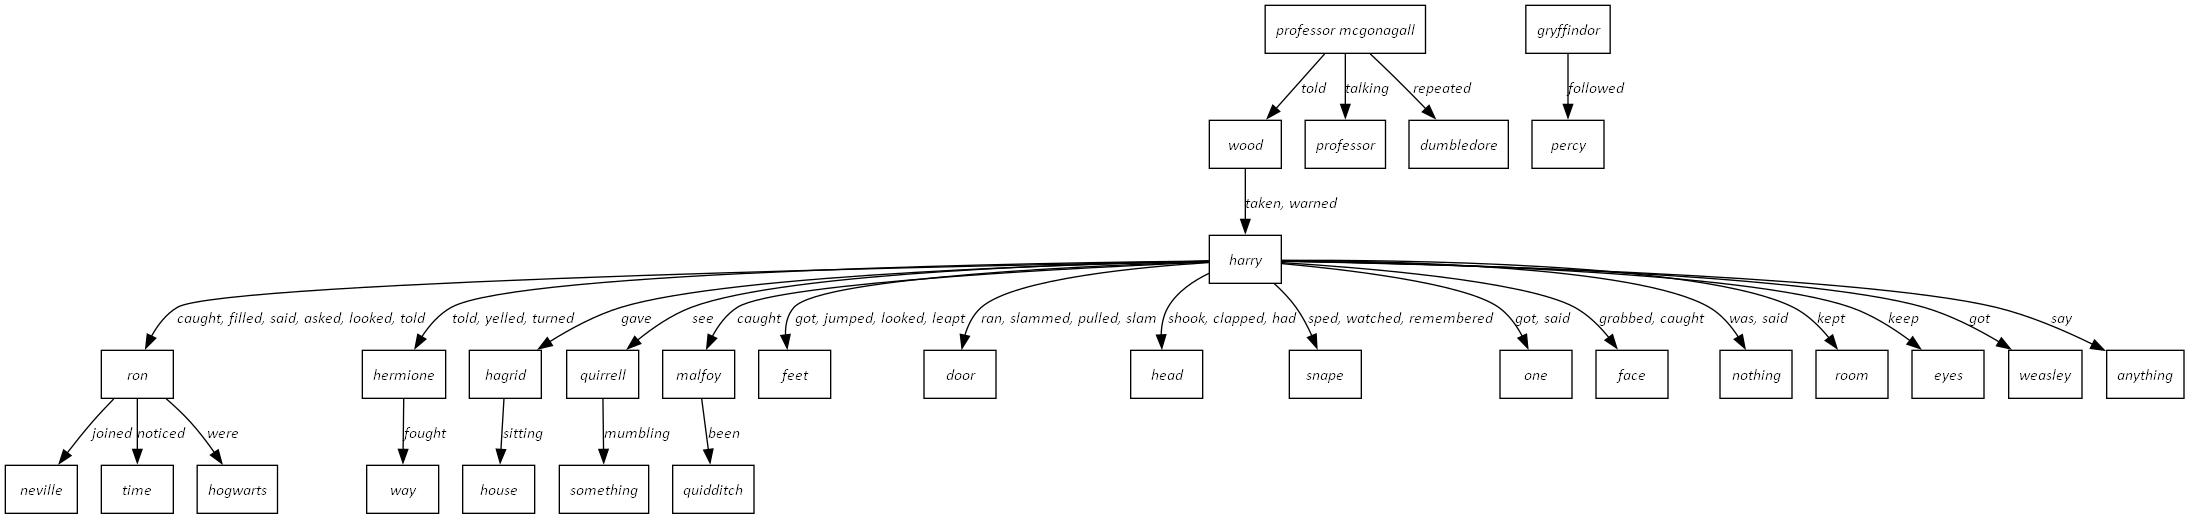

Cluster: #4, cluster chapters: [0]


c:\Users\Zane\uncc\research\hierarchical_clustering\concept_hierarchies\preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
c:\Users\Zane\uncc\research\hierarchical_clustering\concept_hierarchies\preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


                    word                                          word_type  \
0                dursley                          {'NNP': 47, 'PERSON': 41}   
1             dumbledore  {'NNP': 31, 'PERSON': 23, 'ORGANIZATION': 2, '...   
3              professor  {'NNP': 29, 'PERSON': 17, 'ORGANIZATION': 1, '...   
6             mcgonagall       {'NNP': 25, 'PERSON': 15, 'ORGANIZATION': 2}   
7   professor mcgonagall  {'VB': 1, 'NNP': 54, 'ORGANIZATION': 3, 'PERSO...   
8                 people                                        {'NNS': 21}   
9                    cat                                {'NN': 20, 'JJ': 1}   
11                 harry                          {'NNP': 20, 'PERSON': 20}   
15                 could                                         {'MD': 27}   
16                street                                         {'NN': 14}   
17                hagrid  {'PRP': 1, 'NNP': 12, 'PERSON': 9, 'JJ': 1, 'G...   
18             something                            

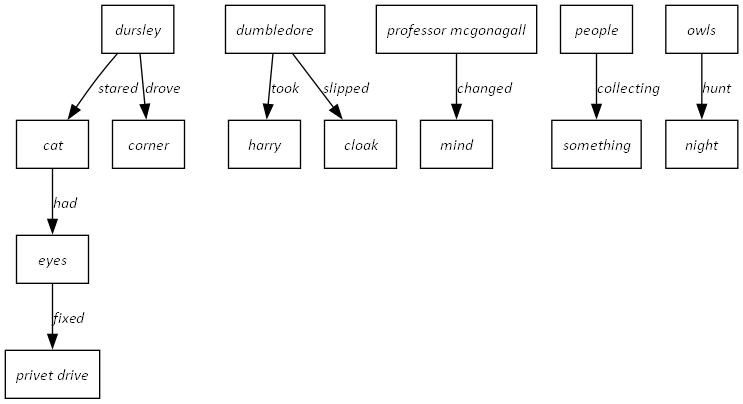

In [18]:
# Run for each cluster
for cluster in range(1, num_topics + 1):
    print(f'Cluster: #{cluster}, cluster chapters: {clusters[cluster]}')
    cluster_chapters = clusters[cluster]
    cluster_titles = [titles[i] for i in cluster_chapters]
    
    text_per_chapter = []
    for idx in cluster_chapters:
        text_per_chapter.append(chapters[idx])
    
    tf_idf_pre_filtering = get_word_types_with_tf_idf(
        text_per_chapter,
        "tf",
        skip_stopwords=True,
        include_verbs=False,
        include_determiners=False,
        include_pronouns=False,
        include_adverbs=False,
        include_numbers=True,
    )
    
    print(tf_idf_pre_filtering.head(50))
    
    top_n_words = tf_idf_pre_filtering.head(50)["word"].values
    
    all_verses = []
    for chapter_idx in cluster_chapters:
        all_verses.extend(sentences_per_chapter[chapter_idx])
        
    directed_relations, relations_to_verbs = get_directed_relations(
        top_n_words=top_n_words,
        all_verses=all_verses,
        verbose=False,
    )
    ordered_directed_relations = order_directed_relations(
        directed_relations=directed_relations,
        tf_idf_pre_filtering=tf_idf_pre_filtering,
        order_by="product",
        include_ordering_wrt_occurences=True,
        verbose=False,
    )
    ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
        ordered_directed_relations=ordered_directed_relations,
    )
    
    draw_hierarchy_tree_from_ontology(
        ontological_hierarchy=ontology_hierarchy,
        relations_to_verbs=relations_to_verbs
    )